In [12]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.patches import RegularPolygon, Polygon
import random
import copy
#%matplotlib inline

## Question 1: Unexpected Plots 

[[ 0.   6. ]
 [-5.2  3. ]
 [-5.2 -3. ]
 [-0.  -6. ]
 [ 5.2 -3. ]
 [ 5.2  3. ]
 [ 0.   6. ]]


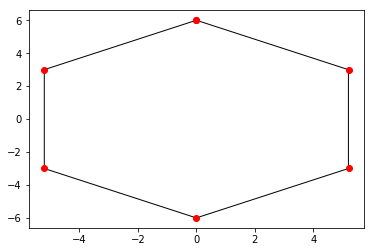

In [13]:
# Create the Hexagon with matplotlib.patches.RegularPolygon
hex = RegularPolygon((0,0), numVertices=6, radius=6 , fill=False)
plt.plot()
plt.gca().add_patch(hex)

#obtain the vertices points
verts = hex.get_path().vertices
trans = hex.get_patch_transform()
points = trans.transform(verts)
points = np.around(points, 2) #points in 2 decimals
print (points)
plt.plot(points[:,0], points[:,1], 'ro')
plt.show()
#from the output one vertice seem to be repeated 


In [9]:
# picking a random point
x = random.randint(-5,5) # spacified based on the vertices to ensure they fall within the hexagon
y = random.randint(-3,3)
p= (x,y) # the picked random point p
p

(1, 1)

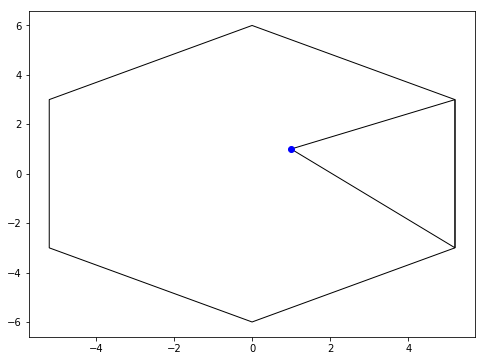

In [14]:
# a list of adjacent vertices
vertices = []
for i,point in enumerate(points):
  if i < len(points) - 1: #not to repeat the last point
    vert_points = ()
    vertices.append((point,points[i+1]))
#print (vertices)

# a fanction to randomly picking the adjacent vertices and connecting to random point p
def triangle(random_point = np.array(p)):
  random_num = random.randint(0, 5)
  random_vertices = list(vertices[random_num])
  random_vertices.append(random_point)
  random_vertices =  np.array(random_vertices)
  #print (random_vertices) # 3 by 2 array
  return random_vertices

#triange T with matplotlib.patches.Polygon
tri_vertices = triangle()
T = Polygon(tri_vertices,fill= False) #triangle T

#visualize the plot
#import copy
fig = plt.figure(figsize=(8,6))
ax = plt.subplot(1,1,1)
hex = copy.copy(hex)

hex.axes = None
hex.figure = None
hex.set_transform(ax.transData)

plt.gca().add_patch(hex)
plt.plot()
plt.gca().add_patch(T)
plt.plot(x, y, 'bo') # plotting the random point p
plt.show()


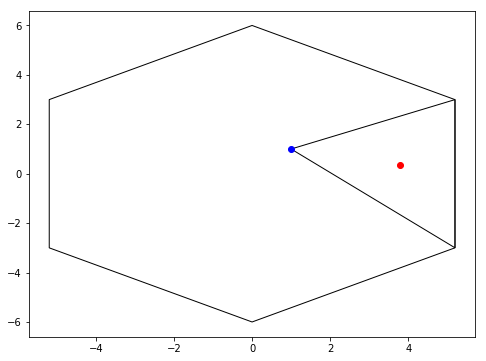

In [16]:
#  a function to compute the centroid of T
def centroid(triangle):
  centroid = [sum(x)/3 for x in zip(*triangle)] # centroid is given by the point ((x1,x2,x3)/3), ((y1,y2,y3)/3)
  return  centroid
centr =  np.array(centroid(tri_vertices))
#print(centr)

#visualizing the point
fig = plt.figure(figsize=(8,6))
ax = plt.subplot(1,1,1)

hex = copy.copy(hex)
tri = copy.copy(T)

hex.axes = None
T.axes = None

hex.figure = None
T.figure = None

hex.set_transform(ax.transData)
T.set_transform(ax.transData)

plt.gca().add_patch(hex)
plt.plot()
plt.gca().add_patch(T)
plt.plot(x, y, 'bo') # the random point
plt.plot(centr[0], centr[1], 'ro') # the centroid
plt.show()

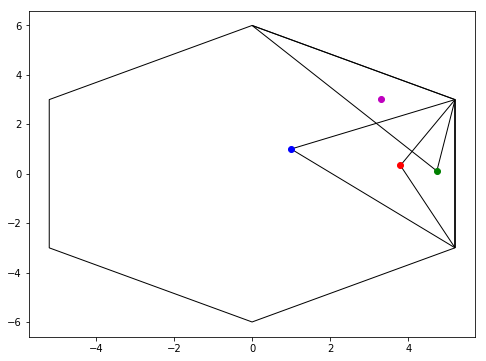

In [17]:
vert =  triangle(random_point = centr) # computing new triangle vertices with a new random point, centr

new_centr =  np.array(centroid(vert)) # computing a new centriod from the new triangle vertices

vert2 =  triangle(random_point = new_centr)

new_centr_1 =  np.array(centroid(vert2))

# visualizing the new random points triangles
T_2  = Polygon(vert,fill= False, closed =True)
T_3  = Polygon(vert2,fill= False, closed =True)

fig = plt.figure(figsize=(8,6))
ax = plt.subplot(1,1,1)

hex = copy.copy(hex)
tri = copy.copy(T)

hex.axes = None
T.axes = None

hex.figure = None
T.figure = None

hex.set_transform(ax.transData)
T.set_transform(ax.transData)

plt.gca().add_patch(hex)
plt.gca().add_patch(T_2)
plt.gca().add_patch(T_3)


plt.gca().add_patch(T)
plt.plot(x, y, 'bo')
plt.plot(centr[0], centr[1], 'ro')
plt.plot(new_centr[0], new_centr[1], 'go')
plt.plot(new_centr_1[0], new_centr_1[1], 'mo')
plt.show()

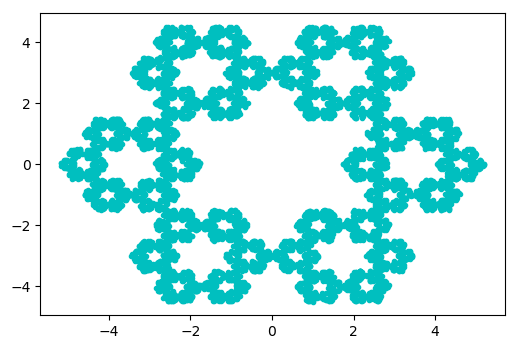

In [18]:
# plotting 10,000 random points
#p = np.array(p)
random_point = centr
random_points = []

for num in range(10000):
  new_vert = triangle(random_point = random_point)
  new_centr =  np.array(centroid(new_vert))
  random_points.append(new_centr)
  random_point = new_centr

random_points = np.array(random_points)
fig = plt.figure(figsize=(6,4), dpi=100)
plt.plot(random_points[:,0],random_points[:,1], 'c.')
plt.show()

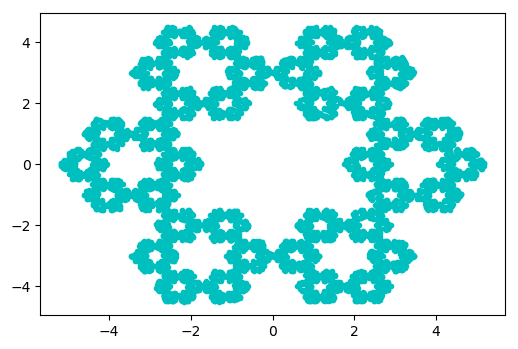

()

In [19]:
# A function for the unexpected Plots
# combine all the previous steps together
def scatter_plot ():
    # Create the Hexagon with matplotlib.patches.RegularPolygon
    hex = RegularPolygon((0,0), numVertices=6, radius=6 , fill=False)

    #obtain the vertices points
    verts = hex.get_path().vertices
    trans = hex.get_patch_transform()
    points = trans.transform(verts)
    points = np.around(points, 2) #points in 2 decimals
    #print (points)
    
    # picking a random point
    x = random.randint(-5,5) # spacified based on the vertices to ensure they fall within the hexagon
    y = random.randint(-3,3)
    p= (x,y) # the picked random point p

        # a list of adjacent vertices
    vertices = []
    for i,point in enumerate(points):
      if i < len(points) - 1: #not to repeat the last point
        vert_points = ()
        vertices.append((point,points[i+1]))
    #print (vertices)

    # a fanction to randomly picking the adjacent vertices and connecting to random point p
    def triangle(random_point = np.array(p)):
      random_num = random.randint(0, 5)
      random_vertices = list(vertices[random_num])
      random_vertices.append(random_point)
      random_vertices =  np.array(random_vertices)
      #print (random_vertices) # 3 by 2 array
      return random_vertices
    #triange T with matplotlib.patches.Polygon
    tri_vertices = triangle()
    #  a function to compute the centroid of T
    def centroid(triangle):
      centroid = [sum(x)/3 for x in zip(*triangle)] # centroid is given by the point ((x1,x2,x3)/3), ((y1,y2,y3)/3)
      return  centroid
    centr =  np.array(centroid(tri_vertices))
    #print(centr)
    
        # plotting 10,000 random points
    #p = np.array(p)
    random_point = centr
    random_points = []

    for num in range(10000):
      new_vert = triangle(random_point = random_point)
      new_centr =  np.array(centroid(new_vert))
      random_points.append(new_centr)
      random_point = new_centr

    random_points = np.array(random_points)
    fig = plt.figure(figsize=(6,4), dpi=100)
    plt.plot(random_points[:,0],random_points[:,1], 'c.')
    plt.show()
    
    return ()

scatter_plot() 

## Question 2: Datascience with Pandas and Movie Data

In [3]:
df0 = pd.read_csv('title.akas.tsv.gz', compression='gzip', header=0, sep='\t', low_memory=False)

In [ ]:
df0.head()

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,1,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0
1,tt0000001,2,Карменсита,RU,\N,\N,\N,0
2,tt0000001,3,Carmencita,US,\N,\N,\N,0
3,tt0000001,4,Carmencita,\N,\N,original,\N,1
4,tt0000002,1,Le clown et ses chiens,\N,\N,original,\N,1


In [ ]:
df0.describe()

,ordering
count,3.423660e+06
mean,3.290978e+00
std,5.002905e+00
min,1.000000e+00
25%,1.000000e+00
50%,1.000000e+00
75%,3.000000e+00
max,1.270000e+02


In [5]:
df1 = pd.read_csv('title.basics.tsv.gz', compression='gzip', header=0, sep='\t', low_memory=False)

In [ ]:
df1.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,\N,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [ ]:
df1.describe()

,isAdult
count,5.330276e+06
mean,3.130288e-02
std,1.243785e+00
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,0.000000e+00
max,2.018000e+03


In [7]:
df2 = pd.read_csv('title.ratings.tsv.gz', compression='gzip', header=0, sep='\t', low_memory=False)

In [ ]:
df2.head()

,tconst,averageRating,numVotes
0,tt0000001,5.8,1422
1,tt0000002,6.4,168
2,tt0000003,6.6,1015
3,tt0000004,6.4,100
4,tt0000005,6.2,1713


In [ ]:
df2.describe()

,averageRating,numVotes
count,874203.000000,8.742030e+05
mean,6.928425,9.739254e+02
std,1.398118,1.540475e+04
min,1.000000,5.000000e+00
25%,6.200000,9.000000e+00
50%,7.100000,2.000000e+01
75%,7.900000,7.700000e+01
max,10.000000,2.003628e+06


In [ ]:
df0.drop_duplicates(inplace = True)

In [ ]:
df0.describe()

,ordering
count,3.423660e+06
mean,3.290978e+00
std,5.002905e+00
min,1.000000e+00
25%,1.000000e+00
50%,1.000000e+00
75%,3.000000e+00
max,1.270000e+02


In [ ]:
df1.drop_duplicates(inplace = True)

In [ ]:
df1.describe()

,isAdult
count,5.330276e+06
mean,3.130288e-02
std,1.243785e+00
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,0.000000e+00
max,2.018000e+03


In [ ]:
df2.drop_duplicates(inplace = True)

In [ ]:
df2.describe()

,averageRating,numVotes
count,874203.000000,8.742030e+05
mean,6.928425,9.739254e+02
std,1.398118,1.540475e+04
min,1.000000,5.000000e+00
25%,6.200000,9.000000e+00
50%,7.100000,2.000000e+01
75%,7.900000,7.700000e+01
max,10.000000,2.003628e+06


In [8]:
#inner merge
df_m1 = pd.merge(df1, df2, on = 'tconst', how='inner')

In [ ]:
df_m1.head()


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",5.8,1422
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short",6.4,168
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance",6.6,1015
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,\N,"Animation,Short",6.4,100
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short",6.2,1713


In [ ]:
df_m1.describe()

,isAdult,averageRating,numVotes
count,874203.000000,874203.000000,8.742030e+05
mean,0.019797,6.928425,9.739254e+02
std,0.139304,1.398118,1.540475e+04
min,0.000000,1.000000,5.000000e+00
25%,0.000000,6.200000,9.000000e+00
50%,0.000000,7.100000,2.000000e+01
75%,0.000000,7.900000,7.700000e+01
max,1.000000,10.000000,2.003628e+06


In [9]:
df_inner = pd.merge(df_m1, df0, left_on = 'tconst', right_on = 'titleId', how='inner')

In [ ]:
df_inner.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",5.8,1422,tt0000001,1,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0
1,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",5.8,1422,tt0000001,2,Карменсита,RU,\N,\N,\N,0
2,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",5.8,1422,tt0000001,3,Carmencita,US,\N,\N,\N,0
3,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",5.8,1422,tt0000001,4,Carmencita,\N,\N,original,\N,1
4,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short",6.4,168,tt0000002,1,Le clown et ses chiens,\N,\N,original,\N,1


In [ ]:
df_inner.describe()

,isAdult,averageRating,numVotes,ordering
count,1.686547e+06,1.686547e+06,1.686547e+06,1.686547e+06
mean,1.639800e-02,6.539073e+00,1.147923e+04,5.292217e+00
std,1.270005e-01,1.278551e+00,6.097374e+04,6.426494e+00
min,0.000000e+00,1.000000e+00,5.000000e+00,1.000000e+00
25%,0.000000e+00,5.800000e+00,2.100000e+01,1.000000e+00
50%,0.000000e+00,6.700000e+00,1.370000e+02,3.000000e+00
75%,0.000000e+00,7.400000e+00,1.281000e+03,7.000000e+00
max,1.000000e+00,1.000000e+01,2.003628e+06,9.900000e+01


In [12]:
df_m2 = pd.merge(df1, df2, on = 'tconst', how='outer', indicator=True)

In [ ]:
df_m2.describe()

,isAdult,averageRating,numVotes
count,5.330276e+06,874203.000000,8.742030e+05
mean,3.130288e-02,6.928425,9.739254e+02
std,1.243785e+00,1.398118,1.540475e+04
min,0.000000e+00,1.000000,5.000000e+00
25%,0.000000e+00,6.200000,9.000000e+00
50%,0.000000e+00,7.100000,2.000000e+01
75%,0.000000e+00,7.900000,7.700000e+01
max,2.018000e+03,10.000000,2.003628e+06


In [13]:
df_outer = pd.merge(df_m2, df0, left_on = 'tconst', right_on = 'titleId', how='outer')

In [14]:
df_outer.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,_merge,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,short,Carmencita,Carmencita,0.0,1894,\N,1,"Documentary,Short",5.8,1422.0,both,tt0000001,1.0,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0
1,tt0000001,short,Carmencita,Carmencita,0.0,1894,\N,1,"Documentary,Short",5.8,1422.0,both,tt0000001,2.0,Карменсита,RU,\N,\N,\N,0
2,tt0000001,short,Carmencita,Carmencita,0.0,1894,\N,1,"Documentary,Short",5.8,1422.0,both,tt0000001,3.0,Carmencita,US,\N,\N,\N,0
3,tt0000001,short,Carmencita,Carmencita,0.0,1894,\N,1,"Documentary,Short",5.8,1422.0,both,tt0000001,4.0,Carmencita,\N,\N,original,\N,1
4,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0.0,1892,\N,5,"Animation,Short",6.4,168.0,both,tt0000002,1.0,Le clown et ses chiens,\N,\N,original,\N,1


In [ ]:
df_outer.describe()

,isAdult,averageRating,numVotes,ordering
count,6.736361e+06,1.975956e+06,1.975956e+06,3.423660e+06
mean,3.090214e-02,6.643070e+00,9.866474e+03,3.290978e+00
std,1.109076e+00,1.310829e+00,5.663827e+04,5.002905e+00
min,0.000000e+00,1.000000e+00,5.000000e+00,1.000000e+00
25%,0.000000e+00,5.900000e+00,1.500000e+01,1.000000e+00
50%,0.000000e+00,6.800000e+00,8.400000e+01,1.000000e+00
75%,0.000000e+00,7.500000e+00,8.820000e+02,3.000000e+00
max,2.018000e+03,1.000000e+01,2.003628e+06,1.270000e+02


In [ ]:
#unique method to identify unique titleTypes
df_outer['titleType'].unique()

array(['short', 'movie', 'tvMovie', 'tvSeries', 'tvEpisode', 'tvShort',
       'tvMiniSeries', 'tvSpecial', 'video', 'videoGame', nan],
      dtype=object)

In [10]:
df_inner['titleType'].unique()

array(['short', 'movie', 'tvMovie', 'tvSeries', 'tvEpisode', 'tvShort',
       'tvMiniSeries', 'tvSpecial', 'video', 'videoGame'], dtype=object)

In [15]:
#making a new dataframe with language 'en', region 'us' and movies
df_new = df_outer[(df_outer['titleType'].isin(['movie', 'tvMovie'])) & ((df_outer['region'] =='US') | (df_outer['language'] == 'en'))]

In [ ]:
df_new.head(10)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,_merge,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
51,tt0000009,movie,Miss Jerry,Miss Jerry,0.0,1894,\N,45,Romance,5.5,70.0,both,tt0000009,3.0,Miss Jerry,US,\N,\N,\N,0
576,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0.0,1897,\N,20,"Documentary,News,Sport",5.2,266.0,both,tt0000147,1.0,The Corbett-Fitzsimmons Fight,US,\N,\N,\N,0
1840,tt0000630,movie,Hamlet,Amleto,0.0,1908,\N,\N,Drama,3.1,10.0,both,tt0000630,4.0,Hamlet,US,\N,\N,\N,0
1950,tt0000679,movie,The Fairylogue and Radio-Plays,The Fairylogue and Radio-Plays,0.0,1908,\N,120,"Adventure,Fantasy",5.9,26.0,both,tt0000679,1.0,The Fairylogue and Radio-Plays,US,\N,\N,\N,0
2264,tt0000838,movie,A Cultura do Cacau,A Cultura do Cacau,0.0,1909,\N,\N,\N,NaN,NaN,left_only,tt0000838,4.0,The Cultivation of the Cacao Tree,XWW,en,\N,literal English title,0
2370,tt0000886,movie,"Hamlet, Prince of Denmark",Hamlet,0.0,1910,\N,\N,Drama,5.2,16.0,both,tt0000886,2.0,"Hamlet, Prince of Denmark",US,\N,\N,\N,0
2379,tt0000891,movie,Cycle Rider and the Witch,Heksen og cyklisten,0.0,1909,\N,\N,\N,5.4,16.0,both,tt0000891,2.0,The Witch and the Bicyclist,US,\N,\N,\N,0
2382,tt0000891,movie,Cycle Rider and the Witch,Heksen og cyklisten,0.0,1909,\N,\N,\N,5.4,16.0,both,tt0000891,5.0,Cycle Rider and the Witch,US,\N,\N,\N,0
2473,tt0000941,movie,Locura de amor,Locura de amor,0.0,1909,\N,\N,Drama,4.9,7.0,both,tt0000941,2.0,Love Crazy,XWW,en,\N,informal literal title,0
2713,tt0001051,movie,El sueño milagroso,El sueño milagroso,0.0,1909,\N,\N,\N,NaN,NaN,left_only,tt0001051,3.0,Magical Dream,XWW,en,\N,literal English title,0


In [ ]:
df_new.shape
#df_new.to_csv('data_outer.csv')

(305816, 20)

In [16]:
df_new2 = df_inner[(df_inner['titleType'].isin(['movie', 'tvMovie'])) & ((df_inner['region'] =='US') | (df_inner['language'] == 'en'))]

In [ ]:
df_new2.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
51,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45,Romance,5.5,70,tt0000009,3,Miss Jerry,US,\N,\N,\N,0
574,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0,1897,\N,20,"Documentary,News,Sport",5.2,266,tt0000147,1,The Corbett-Fitzsimmons Fight,US,\N,\N,\N,0
1446,tt0000630,movie,Hamlet,Amleto,0,1908,\N,\N,Drama,3.1,10,tt0000630,4,Hamlet,US,\N,\N,\N,0
1520,tt0000679,movie,The Fairylogue and Radio-Plays,The Fairylogue and Radio-Plays,0,1908,\N,120,"Adventure,Fantasy",5.9,26,tt0000679,1,The Fairylogue and Radio-Plays,US,\N,\N,\N,0
1797,tt0000886,movie,"Hamlet, Prince of Denmark",Hamlet,0,1910,\N,\N,Drama,5.2,16,tt0000886,2,"Hamlet, Prince of Denmark",US,\N,\N,\N,0


In [ ]:
df_new2.shape

(180940, 19)

In [17]:
#new column for the selected dataset from inner merged data
pd.options.mode.chained_assignment = None
df_new2['log10Votes'] = np.log10(df_new2['numVotes'])

In [ ]:
df_new2.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,titleId,ordering,title,region,language,types,attributes,isOriginalTitle,log10Votes
51,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45,Romance,5.5,70,tt0000009,3,Miss Jerry,US,\N,\N,\N,0,1.845098
574,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0,1897,\N,20,"Documentary,News,Sport",5.2,266,tt0000147,1,The Corbett-Fitzsimmons Fight,US,\N,\N,\N,0,2.424882
1446,tt0000630,movie,Hamlet,Amleto,0,1908,\N,\N,Drama,3.1,10,tt0000630,4,Hamlet,US,\N,\N,\N,0,1.000000
1520,tt0000679,movie,The Fairylogue and Radio-Plays,The Fairylogue and Radio-Plays,0,1908,\N,120,"Adventure,Fantasy",5.9,26,tt0000679,1,The Fairylogue and Radio-Plays,US,\N,\N,\N,0,1.414973
1797,tt0000886,movie,"Hamlet, Prince of Denmark",Hamlet,0,1910,\N,\N,Drama,5.2,16,tt0000886,2,"Hamlet, Prince of Denmark",US,\N,\N,\N,0,1.204120


In [18]:
#low case of text in 'genres'
df_new2['genres'] = df_new['genres'].str.lower()
df_new2.tail(20)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,titleId,ordering,title,region,language,types,attributes,isOriginalTitle,log10Votes
1686245,tt8900302,movie,Memories of My Body,Kucumbu tubuh indahku,0,2018,\N,105,NaN,6.5,20,tt8900302,2,Memories of My Body,XWW,en,imdbDisplay,\N,0,1.301030
1686250,tt8905022,movie,Histórias que nosso Cinema (não) Contava,Histórias que nosso Cinema (não) Contava,0,2018,\N,80,"comedy,romance",7.2,20,tt8905022,2,Stories Our Cinema Did (Not) Tell,XWW,en,alternative,\N,0,1.301030
1686267,tt8917792,movie,Dreamaway,Dreamaway,0,2018,\N,86,NaN,9.0,6,tt8917792,3,Dream Away,XWW,en,\N,alternative spelling,0,0.778151
1686272,tt8922682,movie,Our Body,A-wol Ba-di,0,2018,\N,93,NaN,8.2,6,tt8922682,1,Our Body,XWW,en,imdbDisplay,\N,0,0.778151
1686277,tt8941334,movie,To Be Continued,Turpinajums,0,2018,\N,95,NaN,8.1,9,tt8941334,1,To Be Continued,XWW,en,imdbDisplay,\N,0,0.954243
1686278,tt8941334,movie,To Be Continued,Turpinajums,0,2018,\N,95,NaN,8.1,9,tt8941334,2,To Be Continued,US,\N,imdbDisplay,\N,0,0.954243
1686285,tt8947034,movie,SGaawaay K'uuna,SGaawaay K'uuna,0,2018,\N,\N,NaN,7.9,19,tt8947034,2,Edge of the Knife,CA,en,imdbDisplay,\N,0,1.278754
1686286,tt8947352,tvMovie,Deadly Shores,Deadly Shores,0,2018,\N,88,NaN,4.5,26,tt8947352,1,Deadly Shores,US,\N,\N,\N,0,1.414973
1686293,tt8948614,movie,Reversing Roe,Reversing Roe,0,2018,\N,99,NaN,7.4,368,tt8948614,1,Reversing Roe,US,\N,\N,\N,0,2.565848
1686298,tt8948974,movie,Meteorites,Les météorites,0,2018,\N,85,NaN,7.0,7,tt8948974,3,Meteorites,XWW,en,imdbDisplay,\N,0,0.845098


In [19]:
df_new2.groupby(['genres']).mean().head(10)

,isAdult,averageRating,numVotes,ordering,log10Votes
genres,,,,,
\n,0.012221,6.238749,7764.654206,4.451474,2.181695
action,0.037267,6.205590,13281.472050,4.614907,2.219956
"action,adult",0.000000,8.900000,189.000000,1.000000,2.276462
"action,adult,comedy",0.000000,5.550000,314.500000,2.500000,1.978304
"action,adventure",0.000000,6.202597,9593.064935,6.077922,2.505016
"action,adventure,animation",0.000000,6.230556,11674.583333,5.694444,2.404456
"action,adventure,biography",0.000000,7.316667,1339.000000,6.833333,2.215426
"action,adventure,comedy",0.000000,6.325000,8550.555556,7.222222,2.406552
"action,adventure,crime",0.000000,6.230508,4897.220339,6.728814,2.335031


In [20]:
df_new2.groupby('genres', as_index=False, sort=False).mean().nlargest(10, 'log10Votes' )

,genres,isAdult,averageRating,numVotes,ordering,log10Votes
509,"documentary,history,sport",0.0,8.0,705044.0,7.0,5.848216
555,"adult,animation,fantasy",0.0,7.2,123968.0,13.0,5.093310
270,"animation,family,music",0.0,8.2,123563.0,6.0,5.091888
483,"drama,family,horror",0.0,5.7,88258.0,3.0,4.945754
554,"action,family",0.0,5.6,80187.0,30.0,4.904104
433,"adult,western",0.0,6.1,44864.0,34.0,4.651898
558,"adventure,family,music",0.0,6.9,44841.0,1.0,4.651675
540,"biography,musical",0.0,6.8,42560.0,28.0,4.629002
374,"action,crime,horror",0.0,7.5,40991.0,5.0,4.612689
548,"drama,family,music",0.0,7.6,39731.0,22.0,4.599129


In [21]:
df_new2.groupby('genres', as_index=False)['averageRating'].mean().head(10)

,genres,averageRating
0,\n,6.238749
1,action,6.205590
2,"action,adult",8.900000
3,"action,adult,comedy",5.550000
4,"action,adventure",6.202597
5,"action,adventure,animation",6.230556
6,"action,adventure,biography",7.316667
7,"action,adventure,comedy",6.325000
8,"action,adventure,crime",6.230508
9,"action,adventure,drama",6.286806


In [22]:
df_new2.groupby('genres', as_index=False, sort=False).mean().nlargest(10, 'averageRating' )

,genres,isAdult,averageRating,numVotes,ordering,log10Votes
573,"family,sport",0.0,9.3,20.0,3.0,1.301030
563,"drama,music,sci-fi",0.0,9.2,9.0,1.0,0.954243
492,"action,adult",0.0,8.9,189.0,1.0,2.276462
490,"history,war",0.0,8.3,252.5,1.0,1.867560
512,"family,mystery",0.0,8.3,3212.5,4.0,2.355211
270,"animation,family,music",0.0,8.2,123563.0,6.0,5.091888
426,"adventure,crime,sport",0.0,8.2,1367.0,1.0,3.135769
562,"comedy,sci-fi,thriller",0.0,8.2,16.0,2.0,1.204120
577,"animation,documentary,history",0.0,8.2,8.0,1.0,0.903090
530,"adventure,family,western",0.0,8.1,7.0,1.0,0.845098


In [23]:
#df_new2.info()
df_new2.isnull().sum()

tconst                  0
titleType               0
primaryTitle            0
originalTitle           0
isAdult                 0
startYear               0
endYear                 0
runtimeMinutes          0
genres             165034
averageRating           0
numVotes                0
titleId                 0
ordering                0
title                   0
region                  0
language                0
types                   0
attributes              0
isOriginalTitle         0
log10Votes              0
dtype: int64

In [24]:
df_plot = df_new2.groupby(['averageRating']).mean()
df_plot.reset_index(inplace=True)
df_plot.head()
#df_plot.shape

,averageRating,isAdult,numVotes,ordering,log10Votes
0,1.0,0.000000,107.346154,1.384615,1.477865
1,1.1,0.153846,233.461538,1.923077,2.094683
2,1.2,0.000000,314.652174,1.913043,2.195512
3,1.3,0.000000,502.233333,2.166667,2.035512
4,1.4,0.000000,216.413793,1.655172,1.901698


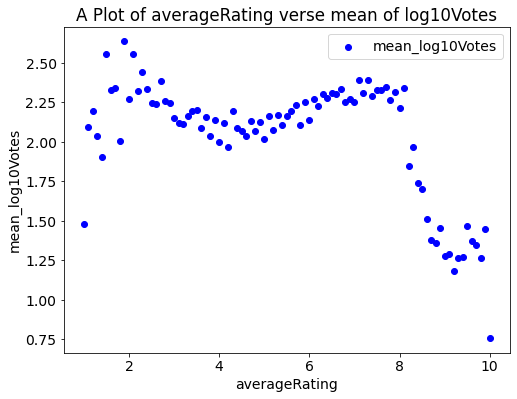

In [25]:
%matplotlib inline
mpl.rc('font', family='sans serif', size=14)
fig = plt.figure(figsize=(8,6))
plt.scatter(df_plot['averageRating'], df_plot['log10Votes'], color='blue', label='mean_log10Votes')
plt.xlabel('averageRating')
plt.ylabel('mean_log10Votes')
plt.title('A Plot of averageRating verse mean of log10Votes')
plt.legend(loc='best')

## Regression model by sklearn

[2.43603481]
[[-0.07128857]]
0.3927965772828904
0.1079714431493822


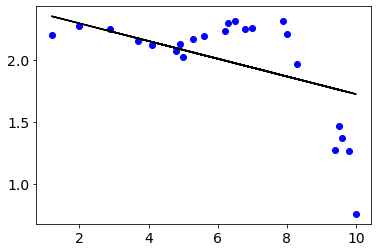

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

x = np.array(df_plot['averageRating']).reshape(-1,1)
y = np.array(df_plot['log10Votes']).reshape(-1,1)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25, random_state=1)
#print(y_train)
regr = LinearRegression ()

regr.fit(x_train, y_train)

print(regr.intercept_)
print(regr.coef_)
print(regr.score(x_test, y_test))

# making predictions
y_pred = regr.predict(x_test)
plt.scatter(x_test,y_test, color='b')
plt.plot(x_test, y_pred, color='k')
print(metrics.mean_squared_error(y_test, y_pred))


[2.48975568]
[[-0.08142263]]
0.33140852032816526
0.09228615425238407


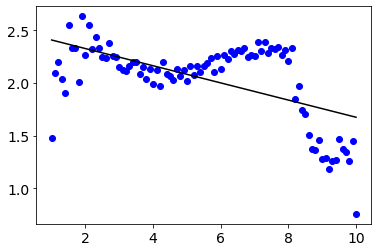

In [27]:
regr.fit(x, y)

print(regr.intercept_)
print(regr.coef_)
print(regr.score(x, y))

y_pred = regr.predict(x)
plt.scatter(x,y, color='b')
plt.plot(x, y_pred, color='k')
print(metrics.mean_squared_error(y, y_pred))

## Regression model with Scipy

In [28]:
from scipy import stats

slope, intercept, rvalue, pvalue, stderr = stats.linregress (x[:,0],y[:,0])

slope, intercept, rvalue**2, stderr


(-0.0814226334821988,
 2.4897556837938897,
 0.3314085203281657,
 0.012258821618000274)

## Regression by Pytorch

In [29]:
x = np.array(df_plot['averageRating'], dtype=np.float32).reshape(-1,1)
y = np.array(df_plot['log10Votes'], dtype=np.float32).reshape(-1,1)

import torch
import torch.nn as nn
#create model
class LinearRegression(nn.Module):
    def __init__(self, inputSize, outputSize):
        super(LinearRegression, self).__init__()
        self.linear=nn.Linear(inputSize, outputSize)
        
    def forward(self, x):
        out=self.linear(x)
        return out
#instantiate model class, loss class and optimizer class
input_dim = 1
output_dim = 1
learning_rate = 0.01
model = LinearRegression(input_dim, output_dim)
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

#train model
epochs = 1000
for epoch in range(epochs):
    epoch += 1
    #convert numpy array to torch variable
    inputs = torch.from_numpy(x).requires_grad_()
    labels = torch.from_numpy(y)
    #clear gradients w.r.t parameters
    optimizer.zero_grad()
    #forward to get output
    outputs = model(inputs)
    #calculate Loss
    loss = criterion(outputs, labels)
    #getting gradients w.r.t parameters
    loss.backward()
    #updating parameters
    optimizer.step()
    print('epoch {}, loss {}'.format(epoch, loss.item()))

epoch 1, loss 1.7711087465286255
epoch 2, loss 0.8991093635559082
epoch 3, loss 0.8434672355651855
epoch 4, loss 0.8351337313652039
epoch 5, loss 0.8295766115188599
epoch 6, loss 0.8242172598838806
epoch 7, loss 0.8189056515693665
epoch 8, loss 0.8136333227157593
epoch 9, loss 0.8083991408348083
epoch 10, loss 0.8032030463218689
epoch 11, loss 0.798044741153717
epoch 12, loss 0.7929237484931946
epoch 13, loss 0.7878398895263672
epoch 14, loss 0.7827929258346558
epoch 15, loss 0.7777825593948364
epoch 16, loss 0.7728086113929749
epoch 17, loss 0.7678707242012024
epoch 18, loss 0.7629687190055847
epoch 19, loss 0.7581023573875427
epoch 20, loss 0.7532711029052734
epoch 21, loss 0.7484748959541321
epoch 22, loss 0.7437135577201843
epoch 23, loss 0.7389868497848511
epoch 24, loss 0.7342943549156189
epoch 25, loss 0.7296359539031982
epoch 26, loss 0.72501140832901
epoch 27, loss 0.720420241355896
epoch 28, loss 0.715862512588501
epoch 29, loss 0.7113378047943115
epoch 30, loss 0.70684593915

In [30]:
# predicted values
predicted = model(torch.from_numpy(x).requires_grad_()).data.numpy()
print (predicted, y)


[[2.3632145]
 [2.3558607]
 [2.3485072]
 [2.3411534]
 [2.3337998]
 [2.326446 ]
 [2.3190925]
 [2.3117387]
 [2.304385 ]
 [2.2970314]
 [2.2896776]
 [2.282324 ]
 [2.2749703]
 [2.2676165]
 [2.260263 ]
 [2.2529092]
 [2.2455556]
 [2.2382019]
 [2.2308483]
 [2.2234945]
 [2.2161407]
 [2.2087872]
 [2.2014334]
 [2.1940799]
 [2.186726 ]
 [2.1793723]
 [2.1720188]
 [2.164665 ]
 [2.1573114]
 [2.1499577]
 [2.1426039]
 [2.1352503]
 [2.1278965]
 [2.120543 ]
 [2.1131892]
 [2.1058354]
 [2.098482 ]
 [2.091128 ]
 [2.0837746]
 [2.0764208]
 [2.069067 ]
 [2.0617135]
 [2.0543597]
 [2.0470061]
 [2.0396523]
 [2.0322986]
 [2.024945 ]
 [2.0175912]
 [2.0102377]
 [2.002884 ]
 [1.9955302]
 [1.9881766]
 [1.9808229]
 [1.9734693]
 [1.9661155]
 [1.9587618]
 [1.9514081]
 [1.9440545]
 [1.9367008]
 [1.929347 ]
 [1.9219935]
 [1.9146397]
 [1.907286 ]
 [1.8999324]
 [1.8925786]
 [1.885225 ]
 [1.8778713]
 [1.8705176]
 [1.863164 ]
 [1.8558102]
 [1.8484566]
 [1.8411028]
 [1.8337493]
 [1.8263955]
 [1.8190418]
 [1.8116882]
 [1.8043344]

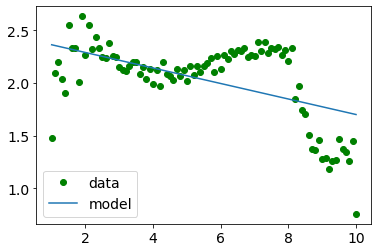

In [31]:
#plot predicted and actual values
plt.plot(x, y, 'go', label = 'data')
plt.plot(x, predicted, label ='model')
plt.legend(loc='best')
plt.show()